In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium



In [2]:
# Load dataset
try:
    df = pd.read_csv('US_Accidents_March23.csv')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")



Dataset loaded successfully.


In [3]:
# Data cleaning
try:
    # Convert 'Start_Time' column to datetime
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
    df.dropna(inplace=True)
    print("Data cleaning completed.")
except Exception as e:
    print(f"Error during data cleaning: {e}")



Error during data cleaning: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 3639775. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


Error during time series analysis: "None of ['Start_Time'] are in the columns"


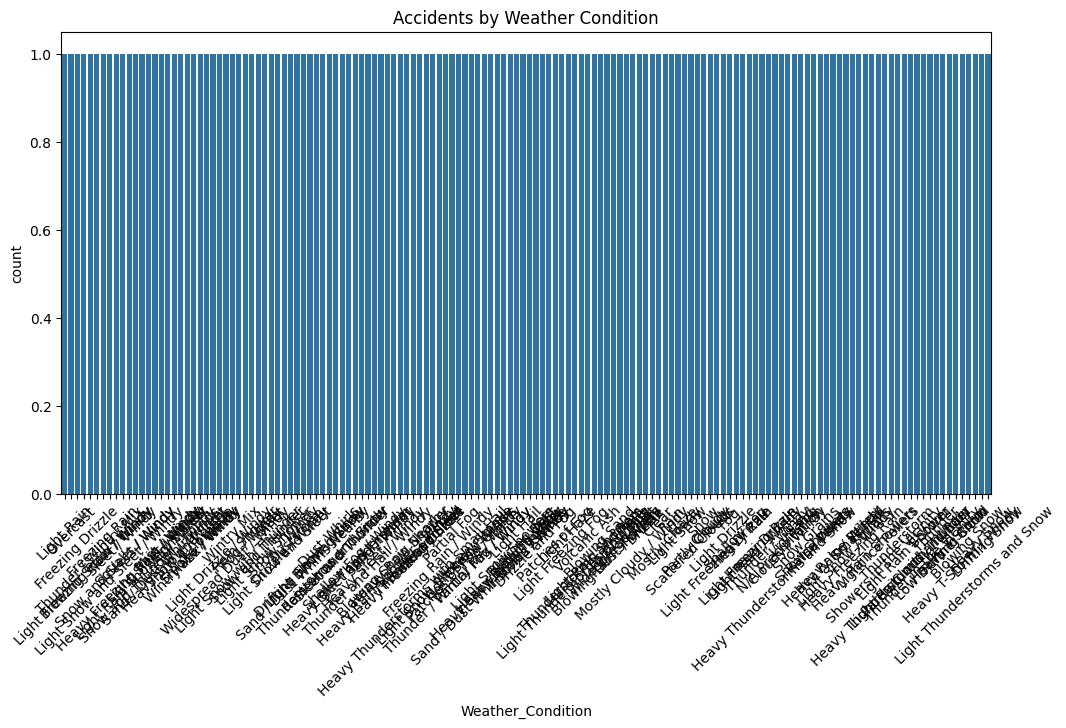

In [6]:
try:
    # Time Series Analysis
    df.set_index('Start_Time', inplace=True)
    
    # Ensure there are no duplicate index entries
    if df.index.duplicated().any():
        df = df[~df.index.duplicated(keep='first')]
    
    plt.figure(figsize=(12, 6))
    df.resample('M').size().plot(title='Monthly Accidents')
    plt.xlabel('Time')
    plt.ylabel('Number of Accidents')
    plt.show()
except Exception as e:
    print(f"Error during time series analysis: {e}")

try:
    # Bar Chart for Weather Conditions
    plt.figure(figsize=(12, 6))
    
    # Check for duplicate labels and drop them for plotting
    if df['Weather_Condition'].duplicated().any():
        df = df.drop_duplicates(subset=['Weather_Condition'])
    
    # Count unique values in 'Weather_Condition'
    sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().index)
    plt.title('Accidents by Weather Condition')
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    print(f"Error during bar chart creation: {e}")



In [10]:
# Heatmap for Accident Locations
try:
    # Check for Latitude and Longitude columns
    if 'Latitude' not in df.columns or 'Longitude' not in df.columns:
        raise KeyError("Columns 'Latitude' or 'Longitude' not found in the dataset.")

    # Get the average location for the map center
    latitude = df['Latitude'].mean()
    longitude = df['Longitude'].mean()
    
    m = folium.Map(location=[latitude, longitude], zoom_start=12)
    for idx, row in df.iterrows():
        folium.CircleMarker(location=(row['Latitude'], row['Longitude']),
                            radius=5,
                            color='red',
                            fill=True).add_to(m)
    m.save('accident_heatmap.html')
    print("Heatmap created successfully.")
except Exception as e:
    print(f"Error creating heatmap: {e}")

# Show plot
plt.show()

Error creating heatmap: "Columns 'Latitude' or 'Longitude' not found in the dataset."
